[View in Colaboratory](https://colab.research.google.com/github/NicknameSoHard/Open_course_ML/blob/master/Additional_task_1.ipynb)

Медиана - точка, которая делит выборку ровно на две части. То-есть ровно половина выборки больше этой точки, а вторая половина меньше. 

Проанализируем разницу данных при заполнении модой или рандомом

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/video_games_sales.csv -P drive/Open_course_ML  

--2018-07-27 13:16:52--  https://raw.githubusercontent.com/Yorko/mlcourse_open/master/data/video_games_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1618040 (1.5M) [text/plain]
Saving to: ‘drive/Open_course_ML/video_games_sales.csv’

video_games_sales.c 100%[===================>]   1.54M  --.-KB/s    in 0.1s    

2018-07-27 13:16:52 (14.9 MB/s) - ‘drive/Open_course_ML/video_games_sales.csv’ saved [1618040/1618040]



In [0]:
data = pd.read_csv('drive/Open_course_ML/video_games_sales.csv') 

In [5]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,Tetris,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Duck Hunt
Platform,Wii,NES,Wii,Wii,GB,GB,DS,Wii,Wii,NES
Year_of_Release,2006,1985,2008,2009,1996,1989,2006,2006,2009,1984
Genre,Sports,Platform,Racing,Sports,Role-Playing,Puzzle,Platform,Misc,Platform,Shooter
Publisher,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo
NA_Sales,41.36,29.08,15.68,15.61,11.27,23.2,11.28,13.96,14.44,26.93
EU_Sales,28.96,3.58,12.76,10.93,8.89,2.26,9.14,9.18,6.94,0.63
JP_Sales,3.77,6.81,3.79,3.28,10.22,4.22,6.5,2.93,4.7,0.28
Other_Sales,8.45,0.77,3.29,2.95,1,0.58,2.88,2.84,2.24,0.47
Global_Sales,82.53,40.24,35.52,32.77,31.37,30.26,29.8,28.92,28.32,28.31


In [49]:
top_Publisher = data['Publisher'].value_counts(dropna = False).index[:45]
data_for_test = data[ data['Publisher'].isin(top_Publisher) ]

data_for_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13238 entries, 0 to 16718
Data columns (total 16 columns):
Name               13236 non-null object
Platform           13238 non-null object
Year_of_Release    12992 non-null float64
Genre              13236 non-null object
Publisher          13184 non-null object
NA_Sales           13238 non-null float64
EU_Sales           13238 non-null float64
JP_Sales           13238 non-null float64
Other_Sales        13238 non-null float64
Global_Sales       13238 non-null float64
Critic_Score       7089 non-null float64
Critic_Count       7089 non-null float64
User_Score         8427 non-null object
User_Count         6670 non-null float64
Developer          8480 non-null object
Rating             8408 non-null object
dtypes: float64(9), object(7)
memory usage: 1.7+ MB


**Попробуем посмотрит распределение признаков с пропусками.**

In [0]:
without_NA = data_for_test.copy().dropna()
#sns.boxplot( y='Publisher', x='Global_Sales', data=data_for_test, orient="h" )
#standard_dist = sns.distplot(data_for_test.dropna().Year_of_Release)

**Заполним пропуски средним**

In [0]:
fill_mean = data_for_test.copy()
fill_mean['Year_of_Release'] = fill_mean['Year_of_Release'].fillna( fill_mean['Year_of_Release'].mean() )

#mean_dist = sns.distplot( fill_mean.Year_of_Release)

**Заполним пропуски медианой**

In [0]:
fill_median = data_for_test.copy()
fill_median['Year_of_Release'] = fill_median['Year_of_Release'].fillna( fill_median['Year_of_Release'].median() )

#sns.boxplot( y='Publisher', x='Critic_Score', data=fill_mode, orient="h" )
#fill_mode_dist = sns.distplot( fill_mode.Year_of_Release )

**Заполним пропуски рандомом**

In [0]:
fill_random = data_for_test.copy()

random_stuff = []
index_names = fill_random.Year_of_Release.value_counts().index
for cl in fill_random.Year_of_Release:
  if pd.isna(cl):
    random_stuff.append( index_names[np.random.randint(0,index_names.size)] )
  else:
    random_stuff.append(cl)
    
fill_random['Year_of_Release'] = random_stuff

#sns.boxplot( y='Publisher', x='Critic_Score', data=fill_random, orient="h" )
#fill_random_dist = sns.distplot(fill_random.Year_of_Release)

**Подведем итог**

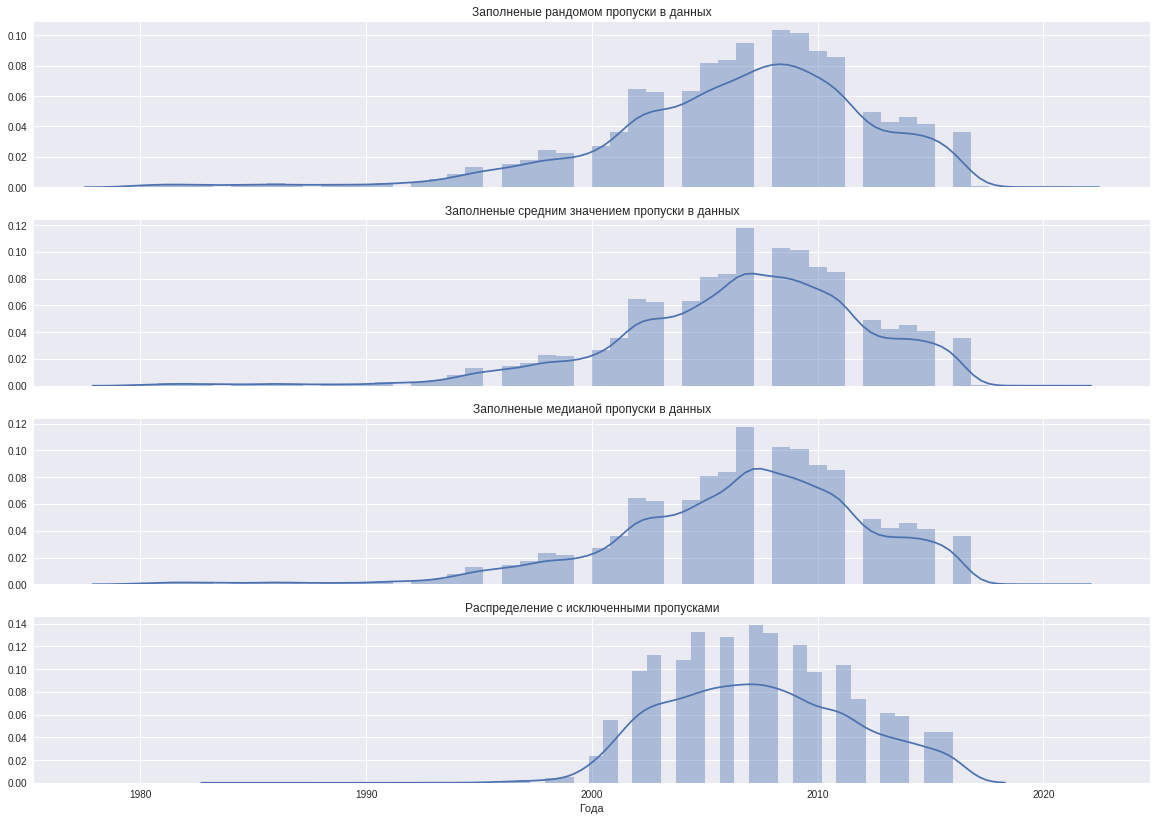

In [59]:
f, (fill_random_dist, fill_mean_dist, fill_median_dist, standard_dist) = plt.subplots(4, 1, sharex='all', figsize= (20,14)  )

sns.distplot( fill_random.Year_of_Release, ax = fill_random_dist )
fill_random_dist.set_title('Заполненые рандомом пропуски в данных')
fill_random_dist.set_xlabel('')

sns.distplot( fill_mean.Year_of_Release, ax = fill_mean_dist )
fill_mean_dist.set_title('Заполненые средним значением пропуски в данных')
fill_mean_dist.set_xlabel('')

sns.distplot( fill_median.Year_of_Release, ax = fill_median_dist )
fill_median_dist.set_title('Заполненые медианой пропуски в данных')
fill_median_dist.set_xlabel('')

sns.distplot( without_NA.Year_of_Release, ax = standard_dist )
standard_dist.set_title('Распределение с исключенными пропусками')
standard_dist.set_xlabel('Года')

#plt.xticks( fill_median_dist.get_xticks()  )  #np.arange(fill_median_dist., 2030, 5) )


plt.show()

In [31]:
fill_median_dist.get_xticks()

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

Как я понимаю, лучше всего в случаях пропусков заменять их медианой,  так как тогда мы получаем полную картину распределения и точно знаем, что искажен только один конкретный признак, соответствующий медиане и самой высокой точке на нашей вероятности. То-есть полезной информации мы теряем незначительно.

В случае с заменой на среднее значение, ситуация очень похожа (а на этих конкретных данных аналогичная), но  среднее значение столбца не обязательно может соответствовать самой высокой части графика распределений и из за этого могут возникать ошибки в оценке общей картины.

Замена случайными значениями тут тоже дало такую же почти картину, но если пропусков будет больше, то распределение будет все более и более искажаться и вскоре уже перестанет соответствовать реальному, так что это рискованно и стоит применять в подобных этому случаях где пропусков не так уж много.